# Tennis Player Performance Analysis - CodeCademy Project

The present analysis is based on data provided by ATP (Professional Tennis Player Association - https://www.atptour.com/) and has the objective of exploring and deriving predictive linear regression models which, when fed with some input variables (so called features), are able de predict within a certain accuracy performance outcomes.

This analysis is part of the learning path provided by CodeCademy to its Machine Learning students.

***

## 1) Exploratory Data Analysis

### Module Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

### Data Import and Cleaning

In [2]:
data = pd.read_csv("tennis_stats.csv")

In [3]:
# Initial Data Visualization
data.info()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [4]:
data.head(10)

Player  Year  FirstServe  FirstServePointsWon  \
0                   Pedro Sousa  2016        0.88                 0.50   
1               Roman Safiullin  2017        0.84                 0.62   
2                   Pedro Sousa  2017        0.83                 0.60   
3           Rogerio Dutra Silva  2010        0.83                 0.64   
4          Daniel Gimeno-Traver  2017        0.81                 0.54   
5  Andres Artunedo Martinavarro  2014        0.77                 0.67   
6               Eduardo Struvay  2014        0.76                 0.65   
7             Riccardo Bellotti  2017        0.76                 0.55   
8               Austin Krajicek  2017        0.76                 0.78   
9              Guilherme Clezar  2011        0.76                 0.56   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   
5                       0.09                  0.55   
6                       0.31                  0.36   
7                       0.35                  0.39   
8                       0.16                  0.57   
9                       0.24                  0.46   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   
5                        0.40     3                  0.50                 6   
6                        0.41     1                  0.29                 6   
7                        0.41     0                  0.50                 9   
8                        0.49     9                  0.25                 3   
9                        0.13     3                  0.00                 5   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   
5  ...            0.10             0.26                   9             0.67   
6  ...            0.20             0.35                   9             0.56   
7  ...            0.31             0.37                  14             0.57   
8  ...            0.06             0.30                  16             0.88   
9  ...            0.00             0.21                   8             0.63   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  
5            0.44                   0.64     0       1     10434      495  
6            0.45                   0.58     0       1     24218     1107  
7            0.45                   0.51     0       1     61154      432  
8            0.50                   0.73     0       1     52940      291  
9            0.38                   0.54     0       1     18829      241  

[10 rows x 24 columns]

In [5]:
### Finding Patterns
### Aside from Player, every other feature is a of numerical data-type
data_num = data.drop(columns = ['Player'])

### Filtering extreme cases or players wich did not participate in any game during the year (injured or retired)
data_num = data_num[(data_num['Wins'] > 0) & (data_num['Losses'] > 0) & (data_num['Winnings'] > 0)]

### New Column - defining Win Ratio as percentage of wins over games
data_num['WinRatio'] = data_num['Wins'] / (data_num['Wins'] + data_num['Losses'])

<Figure size 432x288 with 0 Axes>

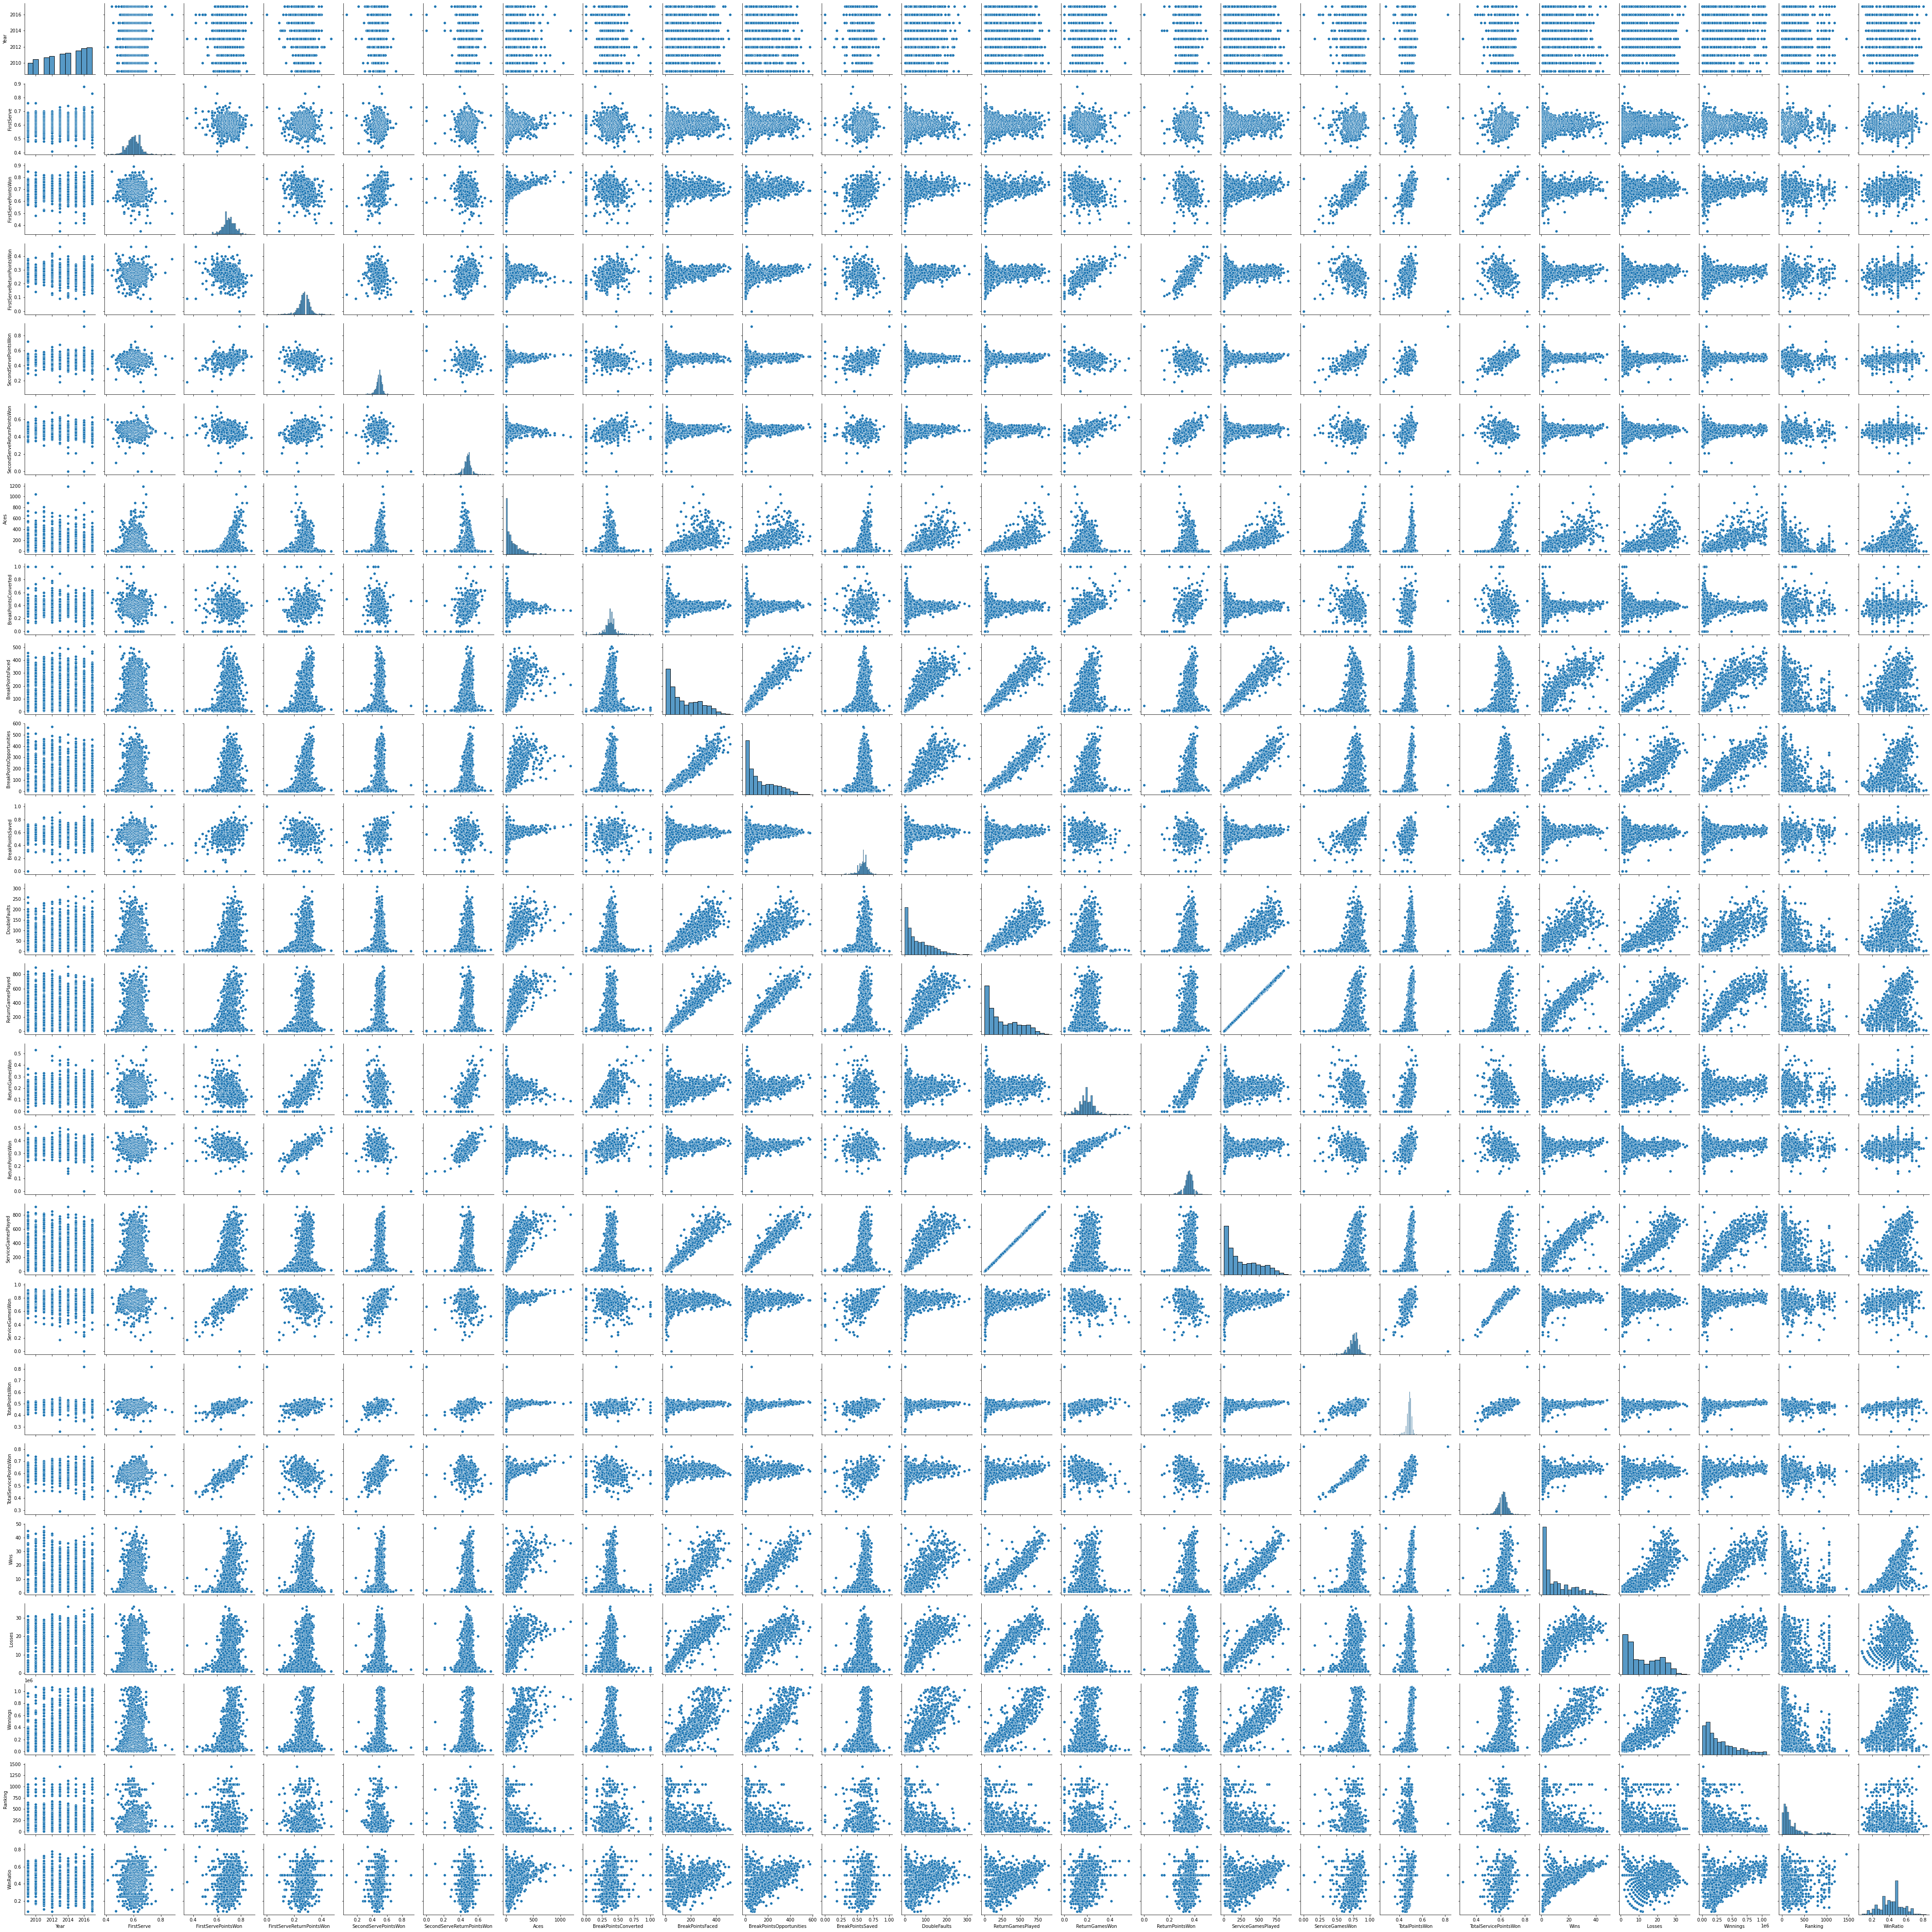

In [6]:
plt.figure()
sns.pairplot(data_num)


Obs: Some features will be selected to answer some of the author's questions regarding predictive models using linear regression techniques (single and multivariable predictors). Some of the variables were selected based on the intensity of the correlation shown on the scatter plot regarding the outcome variables. Others were selected based on the curiosity of the author.

A reduced dataset will be considered with only some of the features available.

The following outcome variables were selected:
20) Wins
21) Losses
22) Winnings
23)Ranking

The following features were chosen as initial candidates:
3) FirstServe
4) FirstServePointsWon
5) FirstServeReturnPointsWon
6) SecondServePointsWon
7) SecondServeReturnPointsWon
8) Aces
9) BreakPointsConverted
10) BreakPointsFaced
11) BreakPointsOpportunities
12) BreakPointsSaved
13) DoubleFaults
14) ReturnGamesPlayed
15) ReturnGamesWon 
16) ReturnPointsWon 
17) ServiceGamesPlayed 
18) ServiceGamesWon 
19) TotalPointsWon 
20) TotalServicePointsWon

The following single or compound variables were finally chosen as outcomes:
1) WinRatio = Wins / (Wins + Losses)
2) Winnings
3) Ranking

The following single or compound variables were finally chosen as features:
1) FirstServeWinRatio = FirstServePointsWon / TotalServicePointsWon
2) SecondServeWinRatio = SecondServePointsWon / TotalServicePointsWon
3) AceRatio = Aces / ServiceGamesPlayed
4) BreakPointsConverted
5) BreakPointsSaved
6) ServicePointsRatio = TotalServicePointsWon / TotalPointsWon


In [7]:
data_num['FirstServeWinRatio'] = data_num['FirstServePointsWon'] / data_num['TotalServicePointsWon']
data_num['SecondServeWinRatio'] = data_num['SecondServePointsWon'] / data_num['TotalServicePointsWon']
data_num['AceRatio'] = data_num['Aces'] / data_num['ServiceGamesPlayed']
data_num['ServicePointsRatio'] = data_num['TotalServicePointsWon'] / data_num['TotalPointsWon']

In [8]:
data_num_focus = data_num[['WinRatio','Winnings','Ranking','FirstServeWinRatio','SecondServeWinRatio','AceRatio','BreakPointsConverted','BreakPointsSaved','ServicePointsRatio']]

### Filtering by Ranking (only the 500 best players)
data_num_focus = data_num_focus[data_num_focus['Ranking'] < 500]

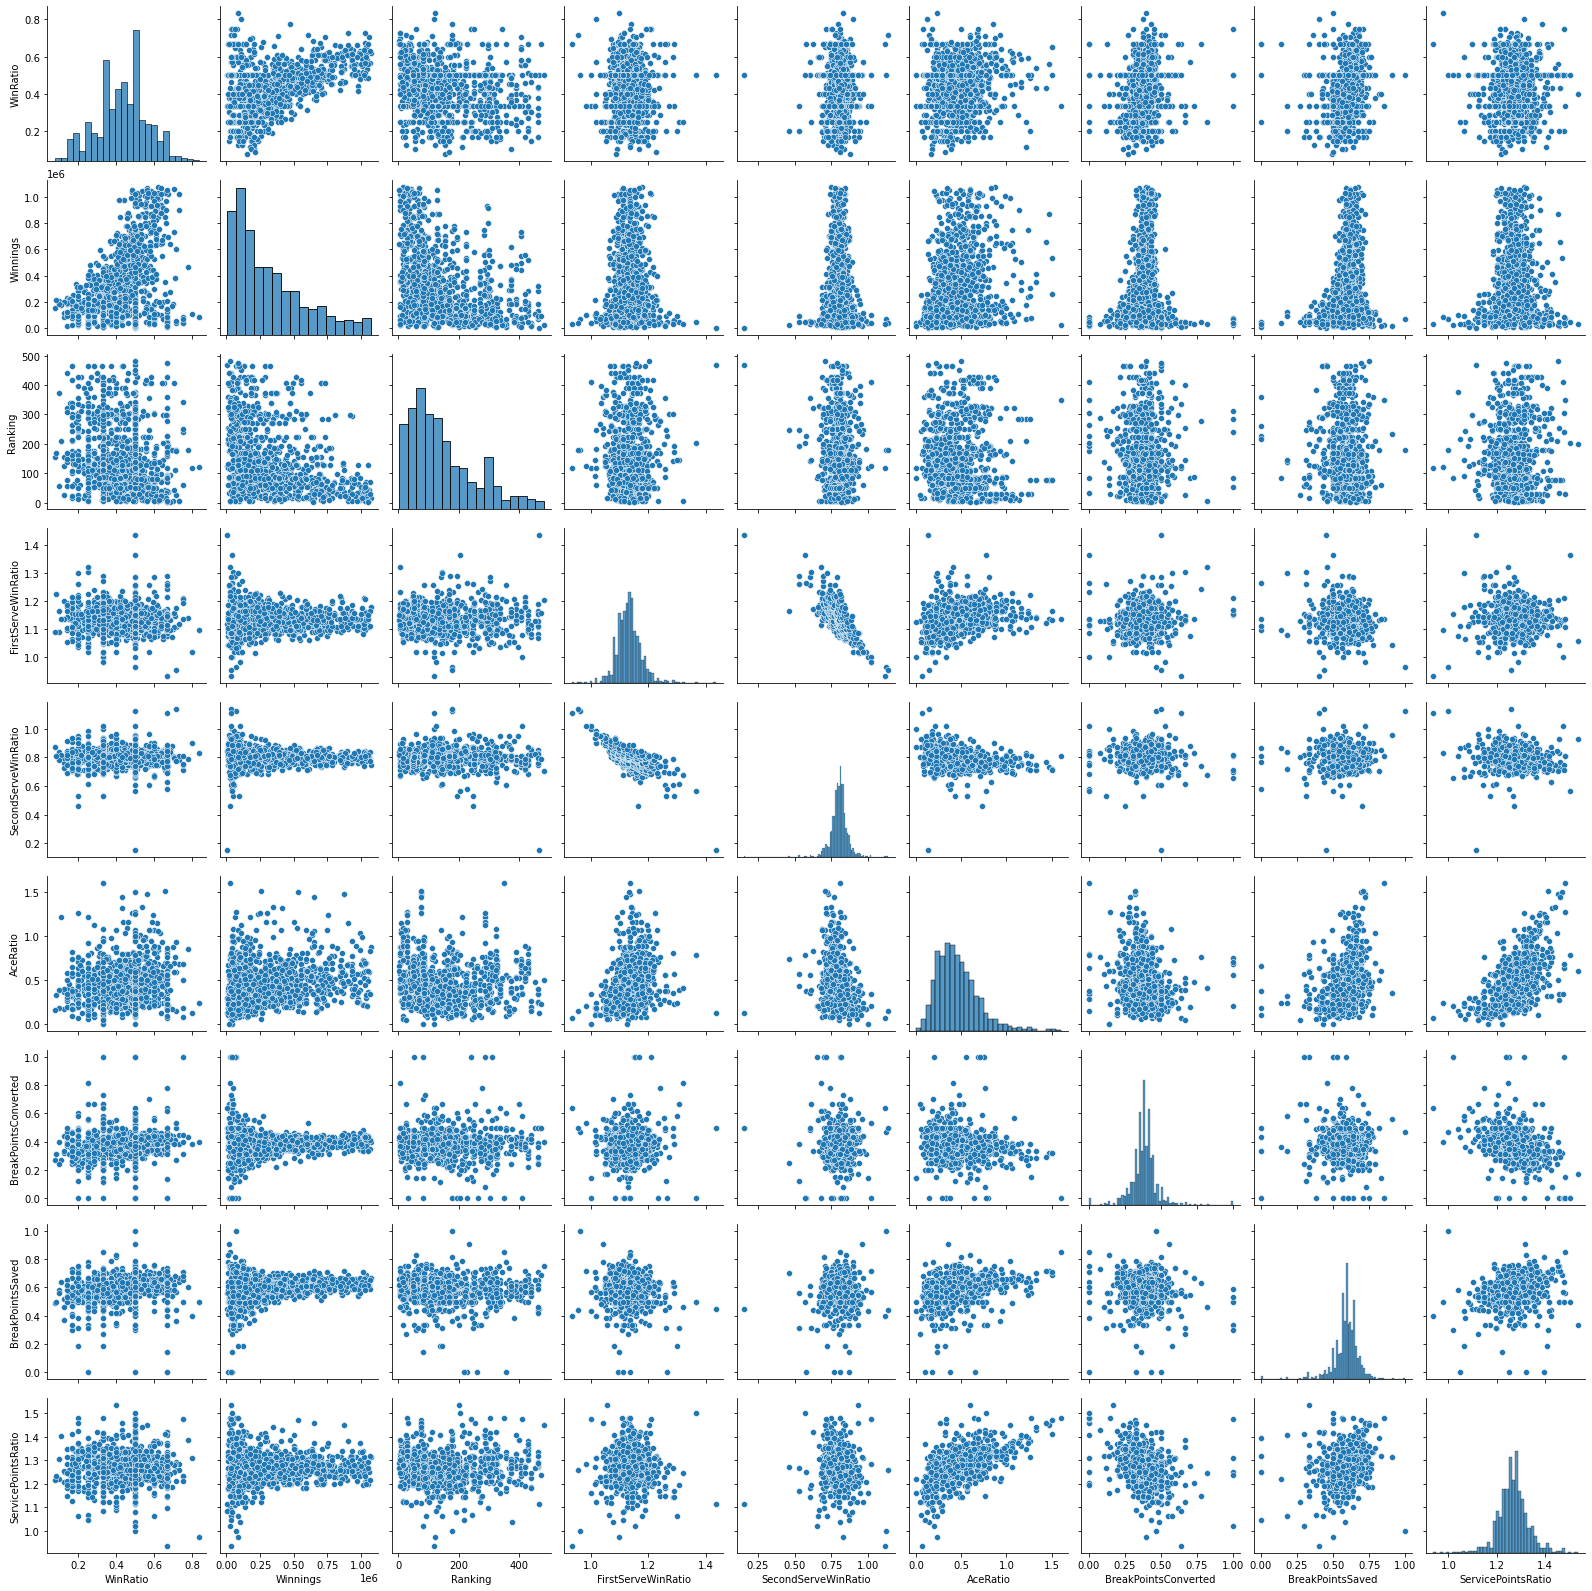

In [9]:
sns.pairplot(data_num_focus)

Comments: specific variables (ratios) do not make better correlations and tendencies themselves, comparing to absolute variables, showing that tennis statiscs are diverse and different players characteristics provide equal chance of succeed in the game.

***

## 2) Functions

In [10]:
### Model Plot and Score Results
def ModelResults():
    plt.figure()
    plt.scatter(y_test, y_predict, alpha = 0.4)
    plt.plot(range(y_train.max()), range(y_train.max()), color = "orange")
    print("Train score: ")
    print(lrmodel.score(x_train, y_train))
    print("Test score: ")
    print(lrmodel.score(x_test, y_test))

***

## 3) Single Linear Regression Models

### Exploring Win Ratio as Predictor of Ranking

In [11]:
winRatio = data_num['WinRatio']
ranking = data_num['Ranking']

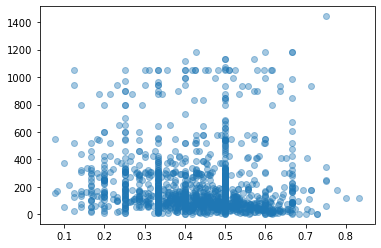

In [12]:
plt.scatter(winRatio, ranking, alpha = 0.4)

Analyzing this graph, data is well scattered despite a clear tendency for better rankings with higher win / loss ratio. Let's make the analysis better by filtering the rows taking into account only players which have played more than 100 game services (new high performance players may have high win/loss ratios but not yet have played enough games to have been placed in a higher ranking, or maybe they were off by injury and played too little during the year). A second filter will be applied taking into account only the players which rank better than 500 (droping outliers).

In [13]:
data_num_filter = data_num[(data_num['ServiceGamesPlayed'] > 100) & (data_num['Ranking'] <= 500)]

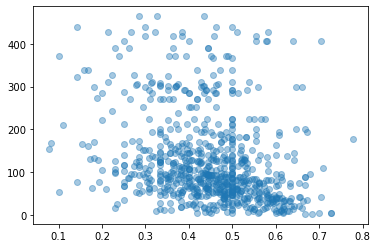

In [14]:
winRatio = data_num_filter['WinRatio']
ranking = data_num_filter['Ranking']
plt.scatter(winRatio, ranking, alpha = 0.4)

In [15]:
print(pearsonr(winRatio, ranking)[0])

-0.2924426642216621


Comments: the correlation between WinRatio and Ranking is not as strong as first thought, and there are many outliers even when applying some filtering. The analysis based on these variables will not proceed. Maybe one of the reasons for outliers is that some new, young players starting to appear on the rankings may have a high win ratio built around strong performances in small, not so prestigious tournaments, which don't convert the performances to more rank points.

###  Exploring Aces as predictor of Wins

In [16]:
aces = data_num['Aces']
wins = data_num['Wins']

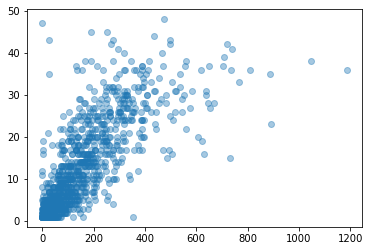

In [17]:
plt.scatter(aces, wins, alpha = 0.4)

In [18]:
print(pearsonr(aces, wins)[0])

0.792817669120885


In [19]:
aces_array = aces.to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(aces_array, wins, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

Train score: 
0.6234534084479613
Test score: 
0.6470536743928806


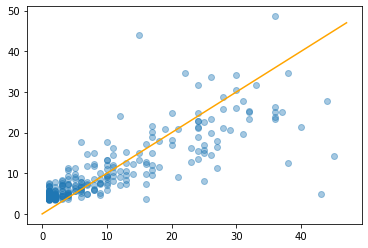

In [20]:
ModelResults()

###  Exploring Double Fault as predictor of Losses

In [151]:
doubleFaults = data_num['DoubleFaults']
losses = data_num['Losses']

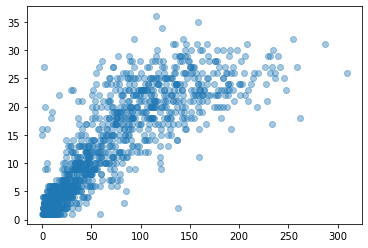

In [152]:
plt.scatter(doubleFaults, losses, alpha = 0.4)

In [153]:
print(pearsonr(doubleFaults, losses)[0])

0.8520243271234696


Comments: There is a strong correlation between number of double faults and losses, so the number os double faults is a good single variable predictor of number of losses.

In [154]:
doubleFaults_array = doubleFaults.to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(doubleFaults_array, losses, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

Train score: 
0.7228131794704121
Test score: 
0.7381592979311512


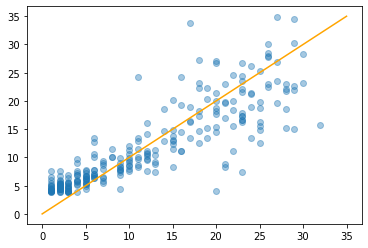

In [156]:
ModelResults()

Comments: based on the above results, the number of double faults is a good fairly accurate predictor of the number of losses, as seen by the scores calculated.

### Exploring Break Point Opportunities as Predictor of Winnings

In [26]:
breakPoints = data_num['BreakPointsOpportunities']
winnings = data_num['Winnings']

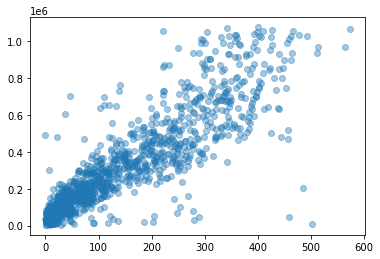

In [27]:
plt.scatter(breakPoints, winnings, alpha = 0.4)

In [28]:
print(pearsonr(breakPoints, winnings)[0])

0.8782094074629848


Comments: There is a strong correlation between number of break point opportunities and winnings, indicating a strong predictor.

In [29]:
breakPoints_array = breakPoints.to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(breakPoints_array, winnings, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

Train score: 
0.7783452239209201
Test score: 
0.7438274528901268


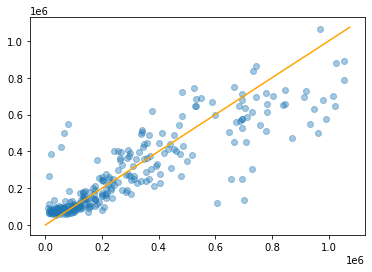

In [30]:
ModelResults()

Comments: based on the above results, the number of break point opportunities created is a strong predictor of the total winnings during the year.

## 4) Double Feature Prediction Linear Regression Models

### Exploring Aces and FirstServePointsWon as predictors of Wins (importance of Serve Perfomance on determining winning success)

In [140]:
aces = data_num['Aces'] 
firstServe = data_num['FirstServePointsWon']
wins = data_num['Wins']

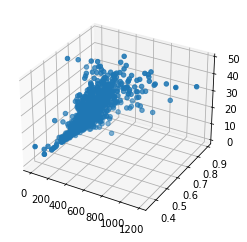

In [141]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(aces, firstServe, wins)

In [143]:
x = data_num[['Aces','FirstServePointsWon']]
y = data_num['Wins']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [144]:
lrmodel.coef_

array([  0.05943739, -20.22472259])

Train score: 
0.6321947908083976
Test score: 
0.6569669695969369


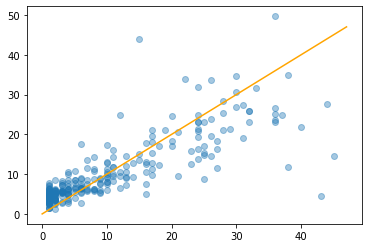

In [145]:
ModelResults()

Comments: the above result indicates that good serving skills are fairly reasonable predictors of number of wins. The addition of a second feature (FirstServePointsWon) slightly increased the model score compared to only a single feature (Aces)

### Exploring DoubleFaults and BreakPointsFaced as predictors of Losses (lack of consistency effect on Losses)

In [164]:
doubleFaults = data_num['DoubleFaults'] 
breaksFaced = data_num['BreakPointsFaced']
losses = data_num['Losses']

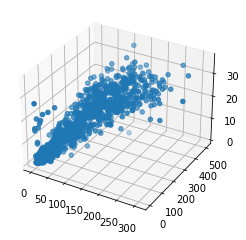

In [165]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(doubleFaults, breaksFaced, losses)

In [167]:
x = data_num[['DoubleFaults','BreakPointsFaced']]
y = losses
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [168]:
lrmodel.coef_

array([0.01599605, 0.06109087])

Train score: 
0.8599697220858644
Test score: 
0.8770033044721091


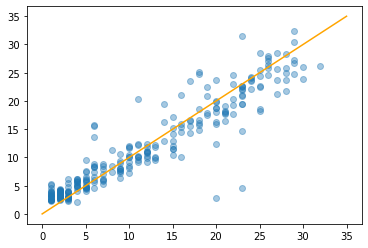

In [169]:
ModelResults()

Comments: adding another feature (BreakPointsFaced) to the model increased the score substantially.

### Exploring BreakPointsOpportunities and ReturnGamesWon as predictors of Winnings (importance of defense performance on Winnings)

In [194]:
firstServeReturn = data_num['FirstServeReturnPointsWon'] 
returnGames = data_num['ReturnGamesWon']
winnings = data_num['Winnings']

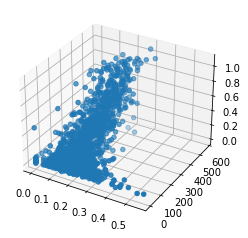

In [195]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(returnGames, breakPoints, winnings)

In [196]:
x = data_num[['BreakPointsOpportunities','ReturnGamesWon']]
y = winnings

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [197]:
lrmodel.coef_

array([   1846.15001488, -327391.11740644])

Train score: 
0.7845294038542922
Test score: 
0.7490023680328053


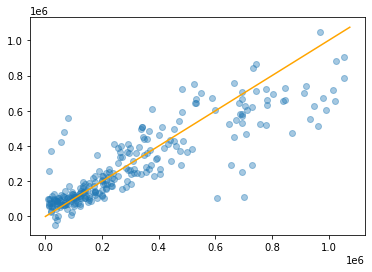

In [198]:
ModelResults()

Comments: the above result indicates that having a lot of break point opportunities is a good indicative of total winnings. The addition of a second feature (ReturnGamesWon) slightly increased the model score compared to only a single feature (BreakPointOpportunities).

## 5) Multiple Feature Prediction Linear Regression Models

### Exploring Offensive Serving Style Statistics effects on Wins - Features: Aces, FirstServePointsWon, FirstServe

In [176]:
x = data_num[['Aces','FirstServePointsWon', 'FirstServe']]
y = wins

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [177]:
lrmodel.coef_

array([  0.05942049, -20.15039838,   0.43253622])

Train score: 
0.6321980634562463
Test score: 
0.6568877361832843


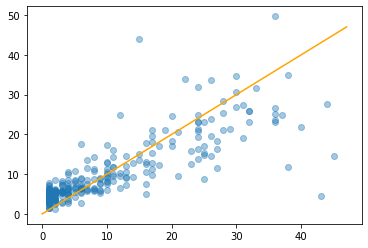

In [178]:
ModelResults()

### Exploring lack of Offensive Consistency impact on Losses - Features: DoubleFaults, BreakPointsFaced, TotalServicePointsWon

In [191]:
x = data_num[['DoubleFaults','BreakPointsFaced','TotalServicePointsWon']]
y = losses
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [192]:
lrmodel.coef_

array([0.01491012, 0.06126656, 3.28711616])

Train score: 
0.8602072466321009
Test score: 
0.8772977931228753


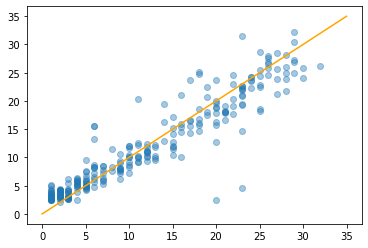

In [193]:
ModelResults()

### Exploring Defense Performance effect on Winnings - Features: BreakPointOpportunities, ReturnGamesWon, FirstServeReturnPointsWon

In [208]:
x = data_num[['BreakPointsOpportunities','ReturnGamesWon','FirstServeReturnPointsWon']]
y = winnings
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [209]:
lrmodel.coef_

array([   1851.58005354, -167989.134905  , -320854.86207516])

Train score: 
0.7855781187510514
Test score: 
0.7514306427126495


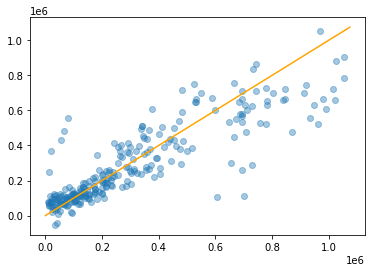

In [210]:
ModelResults()

### Finding a good set of Strong Predictors for Wins and Winnings

Based on previous results, some predictors were chosen to test prediction strength despite of their classification (offensive or defensive).

### Aces, DoubleFaults, BreakPointOpportunities, BrakePointsFaced as predictors of Wins

In [212]:
x = data_num[['Aces','DoubleFaults','BreakPointsOpportunities','BreakPointsFaced']]
y = wins
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [213]:
lrmodel.coef_

array([ 0.02067284, -0.01103512,  0.07691247, -0.01718127])

Train score: 
0.855151664589505
Test score: 
0.8617572660064787


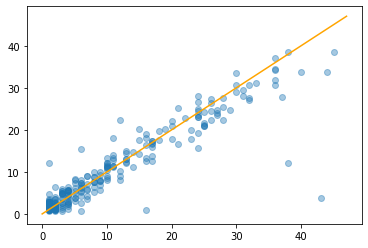

In [214]:
ModelResults()

### BreakPointOpportunities, Ranking and Wins as predictor of Winnings

In [224]:
x = data_num[['BreakPointsOpportunities','Ranking','Wins']]
y = winnings
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
y_predict = lrmodel.predict(x_test)

In [225]:
lrmodel.coef_

array([  759.16731523,   -91.34956941, 13260.86223647])

Train score: 
0.8338162934926603
Test score: 
0.8272222302180503


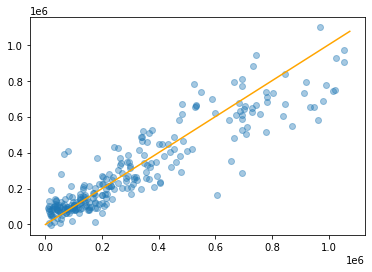

In [226]:
ModelResults()

***

## 6) Conclusions

1) During the exploratory data analysis phase, some variables could be identified as having stronger correlations to some outcomes selected (wins, losses and sinnings)

2) Some questions from the author were formulated, initially based on single feature analysis:

    a) Win Ratio as predictor of Ranking: it was found that the win ratio did not provide a strong enough correlation (less than 0.3 pearson coefficient) to player's ranking, curiously. Maybe, this is due to a bias for the younger, less experienced yet performant players playing in championships which do not provide a good amount of ranking points;
    
    b) Aces as predictor of Wins: the question naturally appeared to investigate if serving performance has a strong effect in number of wins. In this case, the correlation was strong (near 0.80 pearson coefficient), so a investigation branch on this direction was taken. The first linear model have shown a reasonable score (between 0.60 and 0.70), indicating a reasonable correspondence between number of aces and number of wins.
    
    c) Double Fault numbers were investigated as predictors of number of Losses: in this case, correlation was even stronger than the previous item (pearson coefficient of 0.85), and linear model scores higher as well (between 0.70 and 0.75);
    
    d) The last line of investigation was the correlation between Break PointS Opportunities and Winnings: the correlation was the highest among all single feature analyses (pearson 0.88), and the corresponding linear model scores highest as well (between 0.75 and 0.80).
    
3) Based on previous findings, the lines of investigation proceeded adding more features and checking for added linear model scores, which in the majority of the cases ocurred, although one or two did not show substantial imrpovement in model prediction accuracy.

4) Finally, a holistic approach was made selecting different variables, based on previous analysis and results, to predict number of wins and winnings. The vmixing of variables chosen improved substantially previous linear model scores (resulting in higher than 0.80, for both test and train sample sets). These sets of variables (or features) have proved to be strong predictors of wins and winnings.